In [6]:
import numpy as np
import pandas as pd

In [7]:
crsp = pd.read_csv('crsp.csv')
crsp

,permno,date,ret
0,10006,1963-01-31,0.047002
1,10006,1963-02-28,0.038700
2,10006,1963-03-29,-0.009009
3,10006,1963-04-30,0.084848
4,10006,1963-05-31,0.091620
...,...,...,...
730674,93201,1989-11-30,0.209677
730675,93201,1989-12-29,0.040000
730676,93172,1986-07-31,NaN
730677,93172,1986-08-29,-0.772727


In [8]:
crsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730679 entries, 0 to 730678
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   permno  730679 non-null  int64  
 1   date    730679 non-null  object 
 2   ret     707466 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 16.7+ MB


In [9]:
crsp['date'] = pd.to_datetime(crsp['date'])
crsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730679 entries, 0 to 730678
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   permno  730679 non-null  int64         
 1   date    730679 non-null  datetime64[ns]
 2   ret     707466 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.7 MB


In [10]:
crsp[crsp['ret'].isnull()]

,permno,date,ret
257,10007,1988-01-29,NaN
258,10007,1988-02-29,NaN
259,10007,1988-03-31,NaN
260,10007,1988-04-29,NaN
261,10007,1987-12-31,NaN
...,...,...,...
730645,93076,1986-03-31,NaN
730646,93076,1986-04-30,NaN
730647,93076,1986-05-30,NaN
730648,93076,1986-06-30,NaN


In [11]:
crsp['ret'] = crsp['ret'].fillna(0)
crsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730679 entries, 0 to 730678
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   permno  730679 non-null  int64         
 1   date    730679 non-null  datetime64[ns]
 2   ret     730679 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.7 MB


<AxesSubplot:xlabel='date'>

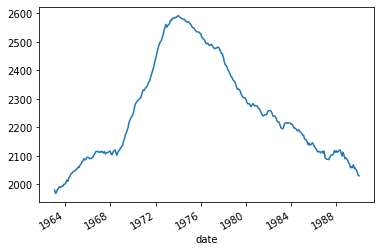

In [12]:
crsp.groupby('date')['permno'].count().plot()

## (1) cumret

In [13]:
J = 6
K = 6

In [14]:
crsp.sort_values(['permno', 'date'], inplace=True, ignore_index=True)
crsp.head(15)

,permno,date,ret
0,10006,1963-01-31,0.047002
1,10006,1963-02-28,0.038700
2,10006,1963-03-29,-0.009009
3,10006,1963-04-30,0.084848
4,10006,1963-05-31,0.091620
5,10006,1963-06-28,-0.001289
6,10006,1963-07-31,-0.045161
7,10006,1963-08-30,0.121081
8,10006,1963-09-30,-0.077670
9,10006,1963-10-31,0.057895


In [15]:
crsp['logret'] = np.log(1 + crsp['ret'])
crsp

,permno,date,ret,logret
0,10006,1963-01-31,0.047002,0.045930
1,10006,1963-02-28,0.038700,0.037970
2,10006,1963-03-29,-0.009009,-0.009050
3,10006,1963-04-30,0.084848,0.081440
4,10006,1963-05-31,0.091620,0.087663
...,...,...,...,...
730674,93201,1989-08-31,0.187500,0.171850
730675,93201,1989-09-29,0.035088,0.034486
730676,93201,1989-10-31,0.050847,0.049597
730677,93201,1989-11-30,0.209677,0.190354


In [16]:
umd = crsp.groupby('permno')['logret'].rolling(J).sum()
umd

permno        
10006   0              NaN
        1              NaN
        2              NaN
        3              NaN
        4              NaN
                    ...   
93201   730674    0.305382
        730675    0.270875
        730676   -0.031749
        730677    0.190354
        730678    0.367725
Name: logret, Length: 730679, dtype: float64

In [17]:
type(umd)

pandas.core.series.Series

In [18]:
umd.reset_index()

,permno,level_1,logret
0,10006,0,NaN
1,10006,1,NaN
2,10006,2,NaN
3,10006,3,NaN
4,10006,4,NaN
...,...,...,...
730674,93201,730674,0.305382
730675,93201,730675,0.270875
730676,93201,730676,-0.031749
730677,93201,730677,0.190354


In [19]:
crsp = crsp.set_index('date')
crsp

,permno,ret,logret
date,,,
1963-01-31,10006,0.047002,0.045930
1963-02-28,10006,0.038700,0.037970
1963-03-29,10006,-0.009009,-0.009050
1963-04-30,10006,0.084848,0.081440
1963-05-31,10006,0.091620,0.087663
...,...,...,...
1989-08-31,93201,0.187500,0.171850
1989-09-29,93201,0.035088,0.034486
1989-10-31,93201,0.050847,0.049597


In [20]:
umd = crsp.groupby('permno')['logret'].rolling(J).sum()
umd

permno  date      
10006   1963-01-31         NaN
        1963-02-28         NaN
        1963-03-29         NaN
        1963-04-30         NaN
        1963-05-31         NaN
                        ...   
93201   1989-08-31    0.305382
        1989-09-29    0.270875
        1989-10-31   -0.031749
        1989-11-30    0.190354
        1989-12-29    0.367725
Name: logret, Length: 730679, dtype: float64

In [21]:
umd = umd.reset_index()
umd

,permno,date,logret
0,10006,1963-01-31,NaN
1,10006,1963-02-28,NaN
2,10006,1963-03-29,NaN
3,10006,1963-04-30,NaN
4,10006,1963-05-31,NaN
...,...,...,...
730674,93201,1989-08-31,0.305382
730675,93201,1989-09-29,0.270875
730676,93201,1989-10-31,-0.031749
730677,93201,1989-11-30,0.190354


In [22]:
umd['cumret'] = np.exp(umd['logret']) - 1
umd

,permno,date,logret,cumret
0,10006,1963-01-31,NaN,NaN
1,10006,1963-02-28,NaN,NaN
2,10006,1963-03-29,NaN,NaN
3,10006,1963-04-30,NaN,NaN
4,10006,1963-05-31,NaN,NaN
...,...,...,...,...
730674,93201,1989-08-31,0.305382,0.357143
730675,93201,1989-09-29,0.270875,0.311111
730676,93201,1989-10-31,-0.031749,-0.031250
730677,93201,1989-11-30,0.190354,0.209677


In [23]:
import numpy as np
import pandas as pd

crsp = pd.read_csv('crsp.csv')
crsp['date'] = pd.to_datetime(crsp['date'])
crsp['ret'] = crsp['ret'].fillna(0)

J = 6
K = 6
crsp.sort_values(['permno', 'date'], inplace=True, ignore_index=True)
crsp['logret'] = np.log(1 + crsp['ret'])
crsp = crsp.set_index('date')

umd = crsp.groupby('permno')['logret'].rolling(J).sum()
umd = umd.reset_index()
umd['cumret'] = np.exp(umd['logret']) - 1

display(crsp)
display(umd)

,permno,ret,logret
date,,,
1963-01-31,10006,0.047002,0.045930
1963-02-28,10006,0.038700,0.037970
1963-03-29,10006,-0.009009,-0.009050
1963-04-30,10006,0.084848,0.081440
1963-05-31,10006,0.091620,0.087663
...,...,...,...
1989-08-31,93201,0.187500,0.171850
1989-09-29,93201,0.035088,0.034486
1989-10-31,93201,0.050847,0.049597


,permno,date,logret,cumret
0,10006,1963-01-31,NaN,NaN
1,10006,1963-02-28,NaN,NaN
2,10006,1963-03-29,NaN,NaN
3,10006,1963-04-30,NaN,NaN
4,10006,1963-05-31,NaN,NaN
...,...,...,...,...
730674,93201,1989-08-31,0.305382,0.357143
730675,93201,1989-09-29,0.270875,0.311111
730676,93201,1989-10-31,-0.031749,-0.031250
730677,93201,1989-11-30,0.190354,0.209677


## (2) momentum

In [24]:
umd.dropna(subset=['cumret'], inplace=True)
umd

,permno,date,logret,cumret
5,10006,1963-06-28,0.242664,0.274640
6,10006,1963-07-31,0.150521,0.162439
7,10006,1963-08-30,0.226845,0.254635
8,10006,1963-09-30,0.155042,0.167707
9,10006,1963-10-31,0.129883,0.138695
...,...,...,...,...
730674,93201,1989-08-31,0.305382,0.357143
730675,93201,1989-09-29,0.270875,0.311111
730676,93201,1989-10-31,-0.031749,-0.031250
730677,93201,1989-11-30,0.190354,0.209677


In [25]:
umd['momr'] = umd.groupby('date')['cumret'].transform(lambda x: pd.qcut(x, 10, labels=False))
umd

,permno,date,logret,cumret,momr
5,10006,1963-06-28,0.242664,0.274640,8
6,10006,1963-07-31,0.150521,0.162439,8
7,10006,1963-08-30,0.226845,0.254635,8
8,10006,1963-09-30,0.155042,0.167707,7
9,10006,1963-10-31,0.129883,0.138695,7
...,...,...,...,...,...
730674,93201,1989-08-31,0.305382,0.357143,8
730675,93201,1989-09-29,0.270875,0.311111,8
730676,93201,1989-10-31,-0.031749,-0.031250,3
730677,93201,1989-11-30,0.190354,0.209677,8


In [26]:
umd['momr'] = umd['momr'] + 1
umd

,permno,date,logret,cumret,momr
5,10006,1963-06-28,0.242664,0.274640,9
6,10006,1963-07-31,0.150521,0.162439,9
7,10006,1963-08-30,0.226845,0.254635,9
8,10006,1963-09-30,0.155042,0.167707,8
9,10006,1963-10-31,0.129883,0.138695,8
...,...,...,...,...,...
730674,93201,1989-08-31,0.305382,0.357143,9
730675,93201,1989-09-29,0.270875,0.311111,9
730676,93201,1989-10-31,-0.031749,-0.031250,4
730677,93201,1989-11-30,0.190354,0.209677,9


In [27]:
from pandas.tseries.offsets import *

umd['medate'] = umd['date'] + MonthEnd(0)
umd

,permno,date,logret,cumret,momr,medate
5,10006,1963-06-28,0.242664,0.274640,9,1963-06-30
6,10006,1963-07-31,0.150521,0.162439,9,1963-07-31
7,10006,1963-08-30,0.226845,0.254635,9,1963-08-31
8,10006,1963-09-30,0.155042,0.167707,8,1963-09-30
9,10006,1963-10-31,0.129883,0.138695,8,1963-10-31
...,...,...,...,...,...,...
730674,93201,1989-08-31,0.305382,0.357143,9,1989-08-31
730675,93201,1989-09-29,0.270875,0.311111,9,1989-09-30
730676,93201,1989-10-31,-0.031749,-0.031250,4,1989-10-31
730677,93201,1989-11-30,0.190354,0.209677,9,1989-11-30


In [28]:
umd['hdate1'] = umd['medate'] + MonthBegin(1)
umd['hdate2'] = umd['medate'] + MonthEnd(K)
umd

,permno,date,logret,cumret,momr,medate,hdate1,hdate2
5,10006,1963-06-28,0.242664,0.274640,9,1963-06-30,1963-07-01,1963-12-31
6,10006,1963-07-31,0.150521,0.162439,9,1963-07-31,1963-08-01,1964-01-31
7,10006,1963-08-30,0.226845,0.254635,9,1963-08-31,1963-09-01,1964-02-29
8,10006,1963-09-30,0.155042,0.167707,8,1963-09-30,1963-10-01,1964-03-31
9,10006,1963-10-31,0.129883,0.138695,8,1963-10-31,1963-11-01,1964-04-30
...,...,...,...,...,...,...,...,...
730674,93201,1989-08-31,0.305382,0.357143,9,1989-08-31,1989-09-01,1990-02-28
730675,93201,1989-09-29,0.270875,0.311111,9,1989-09-30,1989-10-01,1990-03-31
730676,93201,1989-10-31,-0.031749,-0.031250,4,1989-10-31,1989-11-01,1990-04-30
730677,93201,1989-11-30,0.190354,0.209677,9,1989-11-30,1989-12-01,1990-05-31


In [29]:
umd['form_date'] = umd['date']
umd

,permno,date,logret,cumret,momr,medate,hdate1,hdate2,form_date
5,10006,1963-06-28,0.242664,0.274640,9,1963-06-30,1963-07-01,1963-12-31,1963-06-28
6,10006,1963-07-31,0.150521,0.162439,9,1963-07-31,1963-08-01,1964-01-31,1963-07-31
7,10006,1963-08-30,0.226845,0.254635,9,1963-08-31,1963-09-01,1964-02-29,1963-08-30
8,10006,1963-09-30,0.155042,0.167707,8,1963-09-30,1963-10-01,1964-03-31,1963-09-30
9,10006,1963-10-31,0.129883,0.138695,8,1963-10-31,1963-11-01,1964-04-30,1963-10-31
...,...,...,...,...,...,...,...,...,...
730674,93201,1989-08-31,0.305382,0.357143,9,1989-08-31,1989-09-01,1990-02-28,1989-08-31
730675,93201,1989-09-29,0.270875,0.311111,9,1989-09-30,1989-10-01,1990-03-31,1989-09-29
730676,93201,1989-10-31,-0.031749,-0.031250,4,1989-10-31,1989-11-01,1990-04-30,1989-10-31
730677,93201,1989-11-30,0.190354,0.209677,9,1989-11-30,1989-12-01,1990-05-31,1989-11-30


In [30]:
umd = umd[['permno', 'form_date', 'momr', 'hdate1', 'hdate2', 'cumret']]
umd

,permno,form_date,momr,hdate1,hdate2,cumret
5,10006,1963-06-28,9,1963-07-01,1963-12-31,0.274640
6,10006,1963-07-31,9,1963-08-01,1964-01-31,0.162439
7,10006,1963-08-30,9,1963-09-01,1964-02-29,0.254635
8,10006,1963-09-30,8,1963-10-01,1964-03-31,0.167707
9,10006,1963-10-31,8,1963-11-01,1964-04-30,0.138695
...,...,...,...,...,...,...
730674,93201,1989-08-31,9,1989-09-01,1990-02-28,0.357143
730675,93201,1989-09-29,9,1989-10-01,1990-03-31,0.311111
730676,93201,1989-10-31,4,1989-11-01,1990-04-30,-0.031250
730677,93201,1989-11-30,9,1989-12-01,1990-05-31,0.209677


In [31]:
crsp

,permno,ret,logret
date,,,
1963-01-31,10006,0.047002,0.045930
1963-02-28,10006,0.038700,0.037970
1963-03-29,10006,-0.009009,-0.009050
1963-04-30,10006,0.084848,0.081440
1963-05-31,10006,0.091620,0.087663
...,...,...,...
1989-08-31,93201,0.187500,0.171850
1989-09-29,93201,0.035088,0.034486
1989-10-31,93201,0.050847,0.049597


In [32]:
crsp.reset_index(inplace=True)
crsp

,date,permno,ret,logret
0,1963-01-31,10006,0.047002,0.045930
1,1963-02-28,10006,0.038700,0.037970
2,1963-03-29,10006,-0.009009,-0.009050
3,1963-04-30,10006,0.084848,0.081440
4,1963-05-31,10006,0.091620,0.087663
...,...,...,...,...
730674,1989-08-31,93201,0.187500,0.171850
730675,1989-09-29,93201,0.035088,0.034486
730676,1989-10-31,93201,0.050847,0.049597
730677,1989-11-30,93201,0.209677,0.190354


In [33]:
crsp = crsp[['permno', 'date', 'ret']]
crsp

,permno,date,ret
0,10006,1963-01-31,0.047002
1,10006,1963-02-28,0.038700
2,10006,1963-03-29,-0.009009
3,10006,1963-04-30,0.084848
4,10006,1963-05-31,0.091620
...,...,...,...
730674,93201,1989-08-31,0.187500
730675,93201,1989-09-29,0.035088
730676,93201,1989-10-31,0.050847
730677,93201,1989-11-30,0.209677


In [34]:
crsp.shape[0]

730679

In [35]:
n = 100000
list(range(0, crsp.shape[0], n))

[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000]

In [36]:
port = pd.DataFrame()
port

""


In [37]:
port = pd.DataFrame()
n = 100000
for i in range(0, crsp.shape[0], n):
    tmp = crsp.iloc[i: i+n]
    merged = umd.merge(tmp, on=['permno'], how='inner')
    merged = merged[(merged['hdate1'] <= merged['date'])\
                   & (merged['date'] <= merged['hdate2'])]
    port = pd.concat([port, merged])
port

,permno,form_date,momr,hdate1,hdate2,cumret,date,ret
6,10006,1963-06-28,9,1963-07-01,1963-12-31,0.274640,1963-07-31,-0.045161
7,10006,1963-06-28,9,1963-07-01,1963-12-31,0.274640,1963-08-30,0.121081
8,10006,1963-06-28,9,1963-07-01,1963-12-31,0.274640,1963-09-30,-0.077670
9,10006,1963-06-28,9,1963-07-01,1963-12-31,0.274640,1963-10-31,0.057895
10,10006,1963-06-28,9,1963-07-01,1963-12-31,0.274640,1963-11-29,0.246766
...,...,...,...,...,...,...,...,...
1686594,93201,1989-09-29,9,1989-10-01,1990-03-31,0.311111,1989-11-30,0.209677
1686595,93201,1989-09-29,9,1989-10-01,1990-03-31,0.311111,1989-12-29,0.040000
1686612,93201,1989-10-31,4,1989-11-01,1990-04-30,-0.031250,1989-11-30,0.209677
1686613,93201,1989-10-31,4,1989-11-01,1990-04-30,-0.031250,1989-12-29,0.040000


In [38]:
from pandas.tseries.offsets import *

umd.dropna(subset=['cumret'], inplace=True)
umd['momr'] = umd.groupby('date')['cumret'].transform(lambda x: pd.qcut(x, 10, labels=False))
umd['momr'] = umd['momr'] + 1

umd['medate'] = umd['date'] + MonthEnd(0)
umd['hdate1'] = umd['medate'] + MonthBegin(1)
umd['hdate2'] = umd['medate'] + MonthEnd(K)
umd['form_date'] = umd['date']
umd = umd[['permno', 'form_date', 'momr', 'hdate1', 'hdate2']]
crsp.reset_index(inplace=True)
crsp = crsp[['permno', 'date', 'ret']]

port = pd.DataFrame()
n = 100000
for i in range(0, crsp.shape[0], n):
    tmp = crsp.iloc[i: i+n]
    merged = umd.merge(tmp, on=['permno'], how='inner')
    merged = merged[(merged['hdate1'] <= merged['date'])\
                   & (merged['date'] <= merged['hdate2'])]
    port = pd.concat([port, merged])
port

C:\Users\user\AppData\Local\Temp\ipykernel_9804\4183251941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umd.dropna(subset=['cumret'], inplace=True)


KeyError: 'date'

In [ ]:
port = port.sort_values(by=['date', 'momr', 'form_date', 'permno'])
port

In [ ]:
port.groupby(['date', 'momr', 'form_date'])['ret'].mean()

In [ ]:
umd2 = port.groupby(['date', 'momr', 'form_date'])['ret'].mean().reset_index()
umd2

In [ ]:
start_year = 1965
umd2 = umd2[umd2['date'].dt.year >= start_year]
umd2

In [ ]:
300 * 10 * 6

In [ ]:
ewret = umd2.groupby(['date', 'momr'])['ret'].mean().reset_index()
ewret

In [ ]:
ewret.rename(columns={'ret': 'ewret'}, inplace=True)
ewret

In [ ]:
ewret.groupby(['momr'])['ewret'].describe()

In [ ]:
ewret.groupby(['momr'])['ewret'].describe()[['count', 'mean', 'std']]

In [ ]:
umd2 = port.groupby(['date', 'momr', 'form_date'])['ret'].mean().reset_index()
start_year = 1965
umd2 = umd2[umd2['date'].dt.year >= start_year]
ewret = umd2.groupby(['date', 'momr'])['ret'].mean().reset_index()
ewret.rename(columns={'ret': 'ewret'}, inplace=True)
ewret.groupby(['momr'])['ewret'].describe()[['count', 'mean', 'std']]

In [ ]:
ewret

In [ ]:
ewret2 = ewret.pivot(index='date', columns='momr', values='ewret')
ewret2

In [ ]:
ewret2 = ewret2.add_prefix('port')
ewret2

In [ ]:
ewret2 = ewret2.rename(columns={'port1.0':'losers', 'port10.0':'winners'})
ewret2

In [ ]:
ewret2['long_short'] = ewret2['winners'] - ewret2['losers']
ewret2

In [ ]:
mom_mean = ewret2[['winners', 'losers', 'long_short']].mean().to_frame()
mom_mean

In [ ]:
mom_mean = mom_mean.rename(columns={0:'mean'}).reset_index()
mom_mean

In [ ]:
ewret2['losers']

In [ ]:
from scipy import stats

t_losers = pd.Series(stats.ttest_1samp(ewret2['losers'], 0.0)).to_frame().T
t_winners = pd.Series(stats.ttest_1samp(ewret2['winners'], 0.0)).to_frame().T
t_long_short = pd.Series(stats.ttest_1samp(ewret2['long_short'], 0.0)).to_frame().T
t_output = pd.concat([t_winners, t_losers, t_long_short])\
            .rename(columns={0:'t-stat', 1:'p-value'})
t_output['momr'] = ['winners', 'losers', 'long_short']
t_output

In [ ]:
help(stats.ttest_1samp)

In [ ]:
mom_mean

In [ ]:
pd.merge(mom_mean, t_output, on=['momr'], how='inner')

In [45]:
ewret2 

momr,port1,port2,port3,port4,port5,port6,port7,port8,port9,port10
date,,,,,,,,,,
1965-01-29,0.125148,0.087203,0.072142,0.065067,0.063503,0.059188,0.057857,0.057466,0.060715,0.075762
1965-02-26,0.023498,0.036074,0.039101,0.029394,0.031543,0.029517,0.031333,0.035150,0.043514,0.032679
1965-03-31,0.029623,0.014346,0.011204,0.015541,0.011194,0.004043,0.007294,0.011785,0.018297,0.023156
1965-04-30,0.030717,0.043300,0.040916,0.033639,0.037757,0.041739,0.040175,0.044794,0.052073,0.053390
1965-05-28,-0.018215,-0.012755,-0.008787,-0.008654,-0.007943,-0.006797,-0.004161,-0.001007,0.005152,0.004448
...,...,...,...,...,...,...,...,...,...,...
1989-08-31,-0.011274,0.011818,0.015079,0.014200,0.024100,0.021361,0.019848,0.019984,0.034438,0.036031
1989-09-29,-0.037375,-0.013684,-0.004932,-0.009640,-0.006757,-0.000103,-0.005796,0.000427,0.006646,0.009885
1989-10-31,-0.106492,-0.073612,-0.045390,-0.052653,-0.053980,-0.046414,-0.043922,-0.050186,-0.057677,-0.075002


In [49]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import *
from scipy import stats

crsp = pd.read_csv('crsp.csv')
crsp['date'] = pd.to_datetime(crsp['date'])
crsp['ret'] = crsp['ret'].fillna(0)

J = 6
K = 6
crsp.sort_values(['permno', 'date'], inplace=True, ignore_index=True)
crsp['logret'] = np.log(1 + crsp['ret'])
crsp = crsp.set_index('date')

umd = crsp.groupby('permno')['logret'].rolling(J).sum()
umd = umd.reset_index()
umd['cumret'] = np.exp(umd['logret']) - 1

umd.dropna(subset=['cumret'], inplace=True)
umd['momr'] = umd.groupby('date')['cumret'].transform(lambda x: pd.qcut(x, 10, labels=False))
umd['momr'] = umd['momr'] + 1

umd['medate'] = umd['date'] + MonthEnd(0)
umd['hdate1'] = umd['medate'] + MonthBegin(1)
umd['hdate2'] = umd['medate'] + MonthEnd(K)
umd['form_date'] = umd['date']
umd = umd[['permno', 'form_date', 'momr', 'hdate1', 'hdate2', 'cumret']]
crsp.reset_index(inplace=True)
crsp = crsp[['permno', 'date', 'ret']]

port = pd.DataFrame()
n = 100000
for i in range(0, crsp.shape[0], n):
    tmp = crsp.iloc[i: i+n]
    merged = umd.merge(tmp, on=['permno'], how='inner')
    merged = merged[(merged['hdate1'] <= merged['date'])\
                   & (merged['date'] <= merged['hdate2'])]
    port = pd.concat([port, merged])

umd2 = port.groupby(['date', 'momr', 'form_date'])['ret'].mean().reset_index()
start_year = 1965
umd2 = umd2[umd2['date'].dt.year >= start_year]
ewret = umd2.groupby(['date', 'momr'])['ret'].mean().reset_index()
ewret.rename(columns={'ret': 'ewret'}, inplace=True)
ewret.groupby(['momr'])['ewret'].describe()[['count', 'mean', 'std']]

ewret2 = ewret.pivot(index='date', columns='momr', values='ewret')
ewret2 = ewret2.add_prefix('port')
ewret2 = ewret2.rename(columns={'port1':'losers', 'port10':'winners'})
ewret2['long_short'] = ewret2['winners'] - ewret2['losers']

mom_mean = ewret2[['winners', 'losers', 'long_short']].mean().to_frame()
mom_mean = mom_mean.rename(columns={0:'mean'}).reset_index()

t_losers = pd.Series(stats.ttest_1samp(ewret2['losers'], 0.0)).to_frame().T
t_winners = pd.Series(stats.ttest_1samp(ewret2['winners'], 0.0)).to_frame().T
t_long_short = pd.Series(stats.ttest_1samp(ewret2['long_short'], 0.0)).to_frame().T
t_output = pd.concat([t_winners, t_losers, t_long_short])\
            .rename(columns={0:'t-stat', 1:'p-value'})
t_output['momr'] = ['winners', 'losers', 'long_short']
pd.merge(mom_mean, t_output, on=['momr'], how='inner')

,momr,mean,t-stat,p-value
0,winners,0.016759,4.208047,0.000034
1,losers,0.008213,1.663901,0.097180
2,long_short,0.008546,2.809272,0.005293


In [ ]:
crsp = pd.read_csv('crsp.csv')
crsp['date'] = pd.to_datetime(crsp['date'])
crsp['ret'] = crsp['ret'].fillna(0)

In [ ]:
J = 6
K = 6
crsp.sort_values(['permno', 'date'], inplace=True, ignore_index=True)
crsp['logret'] = np.log(1 + crsp['ret'])
crsp = crsp.set_index('date')

In [ ]:
#[2] cumulative return 
umd = crsp.groupby('permno')['logret'].rolling(J).sum()
umd = umd.reset_index()
umd['cumret'] = np.exp(umd['logret']) - 1
umd = umd[['permno', 'date', 'cumret']]

In [ ]:
#[3] momentum 
#cumret에 대해서만 dropna실행하고, inplace를 통해 df에 저장
#date로 groupby된 df에서, cumret에 대해, lambda 실행 
umd.dropna(subset=['cumret'], inplace=True)
umd['momr'] = umd.groupby('date')['cumret'].transform(lambda x: pd.qcut(x, 10, labels=False))
umd['momr'] = umd['momr'] + 1

In [ ]:
umd['medate'] = umd['date'] + MonthEnd(0) # momentum end date
umd['hdate1'] = umd['medate'] + MonthBegin(1)
umd['hdate2'] = umd['medate'] + MonthEnd(K) # momentum K months hold date 
umd['form_date'] = umd['date'] # momentum formation date
umd = umd[['permno', 'form_date', 'momr', 'hdate1', 'hdate2']]

In [ ]:
crsp.reset_index(inplace=True)
crsp = crsp[['permno', 'date', 'ret']]

In [ ]:
#[4] merge, ** 실행주의 **
umd = umd[['permno', 'form_date', 'momr', 'hdate1', 'hdate2']]
crsp.reset_index(inplace=True)
crsp = crsp[['permno', 'date', 'ret']] 

merged = umd.merge(crsp, on=['permno'], how='inner')
merged = merged[(merged['hdate1'] <= merged['date'])\
               & (merged['date'] <= merged['hdate2'])]

In [ ]:
#[5] delete
port = pd.DataFrame()
port = merged
port = port.sort_values(by=['date','momr','form_date','permno'])
                            

In [ ]:
#[6] Portfolio return
#momentum 10개, 300개월, 3000행 
umd2 = port.groupby(['date', 'momr', 'form_date'])['ret'].mean().reset_index()
start_year = 1965
umd2 = umd2[umd2['date'].dt.year >= start_year]
ewret = umd2.groupby(['date', 'momr'])['ret'].mean().reset_index()
ewret.rename(columns={'ret': 'ewret'}, inplace=True)

In [ ]:
#[7] Pivot table 
#index: 행위치에 들어갈 열, columns: 열위치에 들어갈 열, values: 데이터로 사용할 열 
#ewret, K(6)개 포트폴리오에 평균 ret값 
ewret2 = ewret.pivot(index='date', columns='momr', values='ewret')
ewret2 = ewret2.add_prefix('port')
ewret2 = ewret2.rename(columns={'port1.0':'losers', 'port10.0':'winners'})
ewret2['long_short'] = ewret2['winners'] - ewret2['losers']

In [ ]:
#[8] t-test
mom_mean = ewret2[['winners', 'losers', 'long_short']].mean().to_frame()
mom_mean = mom_mean.rename(columns={0:'mean'}).reset_index()

t_losers = pd.Series(stats.ttest_1samp(ewret2['losers'], 0.0)).to_frame().T
t_winners = pd.Series(stats.ttest_1samp(ewret2['winners'], 0.0)).to_frame().T
t_long_short = pd.Series(stats.ttest_1samp(ewret2['long_short'], 0.0)).to_frame().T
t_output = pd.concat([t_winners, t_losers, t_long_short])\
            .rename(columns={0:'t-stat', 1:'p-value'})
t_output['momr'] = ['winners', 'losers', 'long_short']
pd.merge(mom_mean, t_output, on=['momr'], how='inner')

In [ ]:
count = ewret.groupby(['momr'])['momr'].count().to_frame().rename(columns={'momr':'count'})
mean = ewret.groupby(['momr'])['ewret'].mean().to_frame()
std = ewret.groupby(['momr'])['ewret'].std().to_frame()
pd.concat([count, mean, std], axis=1)

In [52]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import *
from scipy import stats

crsp = pd.read_csv('crsp.csv')
crsp['date'] = pd.to_datetime(crsp['date'])
crsp['ret'] = crsp['ret'].fillna(0)

J = 6
K = 6
crsp.sort_values(['permno', 'date'], inplace=True, ignore_index=True)
crsp['logret'] = np.log(1 + crsp['ret'])
crsp = crsp.set_index('date')

umd = crsp.groupby('permno')['logret'].rolling(J).sum()
umd = umd.reset_index()
umd['cumret'] = np.exp(umd['logret']) - 1

umd.dropna(subset=['cumret'], inplace=True)
umd['momr'] = umd.groupby('date')['cumret'].transform(lambda x: pd.qcut(x, 10, labels=False))
umd['momr'] = umd['momr'] + 1

umd['medate'] = umd['date'] + MonthEnd(0)
umd['hdate1'] = umd['medate'] + MonthBegin(1) #1-month lag
umd['hdate2'] = umd['medate'] + MonthEnd(K)
umd['form_date'] = umd['date']
umd = umd[['permno', 'form_date', 'momr', 'hdate1', 'hdate2']]
crsp.reset_index(inplace=True)
crsp = crsp[['permno', 'date', 'ret']]

port = pd.DataFrame()
n = 100000
for i in range(0, crsp.shape[0], n):
    tmp = crsp.iloc[i: i+n]
    merged = umd.merge(tmp, on=['permno'], how='inner')
    merged = merged[(merged['hdate1'] <= merged['date'])\
                   & (merged['date'] <= merged['hdate2'])]
    port = pd.concat([port, merged])

umd2 = port.groupby(['date', 'momr', 'form_date'])['ret'].mean().reset_index()
start_year = 1965
umd2 = umd2[umd2['date'].dt.year >= start_year]
ewret = umd2.groupby(['date', 'momr'])['ret'].mean().reset_index()
ewret.rename(columns={'ret': 'ewret'}, inplace=True)
ewret.groupby(['momr'])['ewret'].describe()[['count', 'mean', 'std']]

ewret2 = ewret.pivot(index='date', columns='momr', values='ewret')
ewret2 = ewret2.add_prefix('port')
ewret2 = ewret2.rename(columns={'port1':'losers', 'port10':'winners'})
ewret2['long_short'] = ewret2['winners'] - ewret2['losers']

mom_mean = ewret2[['winners', 'losers', 'long_short']].mean().to_frame()
mom_mean = mom_mean.rename(columns={0:'mean'}).reset_index()

t_losers = pd.Series(stats.ttest_1samp(ewret2['losers'], 0.0)).to_frame().T
t_winners = pd.Series(stats.ttest_1samp(ewret2['winners'], 0.0)).to_frame().T
t_long_short = pd.Series(stats.ttest_1samp(ewret2['long_short'], 0.0)).to_frame().T
t_output = pd.concat([t_winners, t_losers, t_long_short])\
            .rename(columns={0:'t-stat', 1:'p-value'})
t_output['momr'] = ['winners', 'losers', 'long_short']
pd.merge(mom_mean, t_output, on=['momr'], how='inner')

,momr,mean,t-stat,p-value
0,winners,0.016759,4.208047,0.000034
1,losers,0.008213,1.663901,0.097180
2,long_short,0.008546,2.809272,0.005293


## Homework 1 

In [ ]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import *
from scipy import stats

crsp = pd.read_csv('crsp.csv')
crsp['date'] = pd.to_datetime(crsp['date'])
crsp['ret'] = crsp['ret'].fillna(0)

J = 6
K = 6
crsp.sort_values(['permno', 'date'], inplace=True, ignore_index=True)
crsp['logret'] = np.log(1 + crsp['ret'])
crsp = crsp.set_index('date')

umd = crsp.groupby('permno')['logret'].rolling(J).sum()
umd = umd.reset_index()
umd['cumret'] = np.exp(umd['logret']) - 1

umd.dropna(subset=['cumret'], inplace=True)
umd['momr'] = umd.groupby('date')['cumret'].transform(lambda x: pd.qcut(x, 10, labels=False))
umd['momr'] = umd['momr'] + 1

umd['medate'] = umd['date'] + MonthEnd(0)
umd['hdate1'] = umd['medate'] + MonthBegin(2) #1-month lag
umd['hdate2'] = umd['medate'] + MonthEnd(K)
umd['form_date'] = umd['date']
umd = umd[['permno', 'form_date', 'momr', 'hdate1', 'hdate2']]
crsp.reset_index(inplace=True)
crsp = crsp[['permno', 'date', 'ret']]

port = pd.DataFrame()
n = 100000
for i in range(0, crsp.shape[0], n):
    tmp = crsp.iloc[i: i+n]
    merged = umd.merge(tmp, on=['permno'], how='inner')
    merged = merged[(merged['hdate1'] <= merged['date'])\
                   & (merged['date'] <= merged['hdate2'])]
    port = pd.concat([port, merged])

umd2 = port.groupby(['date', 'momr', 'form_date'])['ret'].mean().reset_index()
start_year = 1965
umd2 = umd2[umd2['date'].dt.year >= start_year]
ewret = umd2.groupby(['date', 'momr'])['ret'].mean().reset_index()
ewret.rename(columns={'ret': 'ewret'}, inplace=True)
ewret.groupby(['momr'])['ewret'].describe()[['count', 'mean', 'std']]

ewret2 = ewret.pivot(index='date', columns='momr', values='ewret')
ewret2 = ewret2.add_prefix('port')
ewret2 = ewret2.rename(columns={'port1.0':'losers', 'port10.0':'winners'})
ewret2['long_short'] = ewret2['winners'] - ewret2['losers']

mom_mean = ewret2[['winners', 'losers', 'long_short']].mean().to_frame()
mom_mean = mom_mean.rename(columns={0:'mean'}).reset_index()

t_losers = pd.Series(stats.ttest_1samp(ewret2['losers'], 0.0)).to_frame().T
t_winners = pd.Series(stats.ttest_1samp(ewret2['winners'], 0.0)).to_frame().T
t_long_short = pd.Series(stats.ttest_1samp(ewret2['long_short'], 0.0)).to_frame().T
t_output = pd.concat([t_winners, t_losers, t_long_short])\
            .rename(columns={0:'t-stat', 1:'p-value'})
t_output['momr'] = ['winners', 'losers', 'long_short']
pd.merge(mom_mean, t_output, on=['momr'], how='inner')

In [ ]:
count = ewret.groupby(['momr'])['momr'].count().to_frame().rename(columns={'momr':'count'})
mean = ewret.groupby(['momr'])['ewret'].mean().to_frame()
std = ewret.groupby(['momr'])['ewret'].std().to_frame()
pd.concat([count, mean, std], axis=1)

## Homework2

In [ ]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import *
from scipy import stats

crsp = pd.read_csv('crsp.csv')
crsp['date'] = pd.to_datetime(crsp['date'])
#crsp['ret'] = crsp['ret'].fillna(0)
crsp = crsp[crsp['ret'].notna()] # 해당월의 holding portfolio 제외

J = 6
K = 6
crsp.sort_values(['permno', 'date'], inplace=True, ignore_index=True)
crsp['logret'] = np.log(1 + crsp['ret'])
crsp = crsp.set_index('date')

umd = crsp.groupby('permno')['logret'].rolling(J).sum()
umd = umd.reset_index()
umd['cumret'] = np.exp(umd['logret']) - 1

umd.dropna(subset=['cumret'], inplace=True)
umd['momr'] = umd.groupby('date')['cumret'].transform(lambda x: pd.qcut(x, 10, labels=False))
umd['momr'] = umd['momr'] + 1

umd['medate'] = umd['date'] + MonthEnd(0)
umd['hdate1'] = umd['medate'] + MonthBegin(1)
umd['hdate2'] = umd['medate'] + MonthEnd(K)
umd['form_date'] = umd['date']
umd = umd[['permno', 'form_date', 'momr', 'hdate1', 'hdate2']]
crsp.reset_index(inplace=True)
crsp = crsp[['permno', 'date', 'ret']]

port = pd.DataFrame()
n = 100000
for i in range(0, crsp.shape[0], n):
    tmp = crsp.iloc[i: i+n]
    merged = umd.merge(tmp, on=['permno'], how='inner')
    merged = merged[(merged['hdate1'] <= merged['date'])\
                   & (merged['date'] <= merged['hdate2'])]
    port = pd.concat([port, merged])

umd2 = port.groupby(['date', 'momr', 'form_date'])['ret'].mean().reset_index()
start_year = 1965
umd2 = umd2[umd2['date'].dt.year >= start_year]
ewret = umd2.groupby(['date', 'momr'])['ret'].mean().reset_index()
ewret.rename(columns={'ret': 'ewret'}, inplace=True)
ewret.groupby(['momr'])['ewret'].describe()[['count', 'mean', 'std']]

ewret2 = ewret.pivot(index='date', columns='momr', values='ewret')
ewret2 = ewret2.add_prefix('port')
ewret2 = ewret2.rename(columns={'port1.0':'losers', 'port10.0':'winners'})
ewret2['long_short'] = ewret2['winners'] - ewret2['losers']

mom_mean = ewret2[['winners', 'losers', 'long_short']].mean().to_frame()
mom_mean = mom_mean.rename(columns={0:'mean'}).reset_index()

t_losers = pd.Series(stats.ttest_1samp(ewret2['losers'], 0.0)).to_frame().T
t_winners = pd.Series(stats.ttest_1samp(ewret2['winners'], 0.0)).to_frame().T
t_long_short = pd.Series(stats.ttest_1samp(ewret2['long_short'], 0.0)).to_frame().T
t_output = pd.concat([t_winners, t_losers, t_long_short])\
            .rename(columns={0:'t-stat', 1:'p-value'})
t_output['momr'] = ['winners', 'losers', 'long_short']
pd.merge(mom_mean, t_output, on=['momr'], how='inner')

In [ ]:
count = ewret.groupby(['momr'])['momr'].count().to_frame().rename(columns={'momr':'count'})
mean = ewret.groupby(['momr'])['ewret'].mean().to_frame()
std = ewret.groupby(['momr'])['ewret'].std().to_frame()
pd.concat([count, mean, std], axis=1)